<a href="https://colab.research.google.com/github/lalitha1201/Alternusvera_Social-Media-/blob/master/Alternus_Vera__Social_media.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/facebook-fact-check.csv')
#check out the rows and colum.shape
df.shape

(2282, 12)

In [0]:
df.head()

,account_id,post_id,Category,Page,Post URL,Date Published,Post Type,Rating,Debate,share_count,reaction_count,comment_count
0,184096565021911,1035057923259100,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,no factual content,NaN,NaN,146.0,15.0
1,184096565021911,1035269309904628,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,1.0,33.0,34.0
2,184096565021911,1035305953234297,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,34.0,63.0,27.0
3,184096565021911,1035322636565962,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,35.0,170.0,86.0
4,184096565021911,1035352946562931,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,mostly true,NaN,568.0,3188.0,2815.0


In [0]:
percentage = lambda x : (x * 100).round(1).astype(str)+ "%"''

In [0]:
Reaction_cols = [
    "share_count",
    "reaction_count",
    "comment_count"
]

In [0]:
ratings = ["mostly false", "mixture of true and false", "mostly true", "no factual content"]

facts_ratings = ["mostly false", "mixture of true and false", "mostly true"]


In [0]:
category_grp = df.groupby("Category")
page_grp = df.groupby([ "Category", "Page" ])
type_grp = df.groupby([ "Category", "Page", "Post Type" ])

Rating by category

In [0]:
rating_by_category = category_grp["Rating"].value_counts().unstack()[ratings].fillna(0)
rating_by_category["total"] = rating_by_category.sum(axis=1)
rating_by_category

Rating,mostly false,mixture of true and false,mostly true,no factual content,total
Category,,,,,
left,22.0,68.0,265.0,116.0,471.0
mainstream,0.0,8.0,1085.0,52.0,1145.0
right,82.0,169.0,319.0,96.0,666.0


In [0]:
(rating_by_category[ratings].T / rating_by_category[ratings].sum(axis=1)).pipe(percentage)

Category,left,mainstream,right
Rating,,,
mostly false,4.7%,0.0%,12.3%
mixture of true and false,14.4%,0.7%,25.4%
mostly true,56.3%,94.8%,47.9%
no factual content,24.6%,4.5%,14.4%


In [0]:
(rating_by_category[facts_ratings].T / rating_by_category[facts_ratings].sum(axis=1)).pipe(percentage)

Category,left,mainstream,right
Rating,,,
mostly false,6.2%,0.0%,14.4%
mixture of true and false,19.2%,0.7%,29.6%
mostly true,74.6%,99.3%,56.0%


# Rating by page

In [0]:
rating_by_page = page_grp["Rating"].value_counts().unstack()[ratings].fillna(0)
rating_by_page["total"] = rating_by_page.sum(axis=1)
rating_by_page

Rating                        mostly false  mixture of true and false  \
Category   Page                                                         
left       Addicting Info              8.0                       25.0   
           Occupy Democrats            9.0                       33.0   
           The Other 98%               5.0                       10.0   
mainstream ABC News Politics           0.0                        2.0   
           CNN Politics                0.0                        4.0   
           Politico                    0.0                        2.0   
right      Eagle Rising               30.0                       54.0   
           Freedom Daily              26.0                       26.0   
           Right Wing News            26.0                       89.0   

Rating                        mostly true  no factual content  total  
Category   Page                                                       
left       Addicting Info            96.0                11.0  140.0  
           Occupy Democrats         102.0                65.0  209.0  
           The Other 98%             67.0                40.0  122.0  
mainstream ABC News Politics        172.0                26.0  200.0  
           CNN Politics             385.0                20.0  409.0  
           Politico                 528.0                 6.0  536.0  
right      Eagle Rising             121.0                81.0  286.0  
           Freedom Daily             56.0                 4.0  112.0  
           Right Wing News          142.0                11.0  268.0

In [0]:
(rating_by_page[ratings].T / rating_by_page[ratings].sum(axis=1)).pipe(percentage)

Category                            left                                 \
Page                      Addicting Info Occupy Democrats The Other 98%   
Rating                                                                    
mostly false                        5.7%             4.3%          4.1%   
mixture of true and false          17.9%            15.8%          8.2%   
mostly true                        68.6%            48.8%         54.9%   
no factual content                  7.9%            31.1%         32.8%   

Category                         mainstream                        \
Page                      ABC News Politics CNN Politics Politico   
Rating                                                              
mostly false                           0.0%         0.0%     0.0%   
mixture of true and false              1.0%         1.0%     0.4%   
mostly true                           86.0%        94.1%    98.5%   
no factual content                    13.0%         4.9%     1.1%   

Category                         right                                
Page                      Eagle Rising Freedom Daily Right Wing News  
Rating                                                                
mostly false                     10.5%         23.2%            9.7%  
mixture of true and false        18.9%         23.2%           33.2%  
mostly true                      42.3%         50.0%           53.0%  
no factual content               28.3%          3.6%            4.1%

In [0]:
(rating_by_page[facts_ratings].T / rating_by_page[facts_ratings].sum(axis=1)).pipe(percentage)

Category                            left                                 \
Page                      Addicting Info Occupy Democrats The Other 98%   
Rating                                                                    
mostly false                        6.2%             6.2%          6.1%   
mixture of true and false          19.4%            22.9%         12.2%   
mostly true                        74.4%            70.8%         81.7%   

Category                         mainstream                        \
Page                      ABC News Politics CNN Politics Politico   
Rating                                                              
mostly false                           0.0%         0.0%     0.0%   
mixture of true and false              1.1%         1.0%     0.4%   
mostly true                           98.9%        99.0%    99.6%   

Category                         right                                
Page                      Eagle Rising Freedom Daily Right Wing News  
Rating                                                                
mostly false                     14.6%         24.1%           10.1%  
mixture of true and false        26.3%         24.1%           34.6%  
mostly true                      59.0%         51.9%           55.3%

# Number of posts by date

In [0]:
posts_by_date_by_category = category_grp["Date Published"].value_counts().unstack()
posts_by_date_by_category["Avg. Per Day"] = posts_by_date_by_category.mean(axis=1).round(0)
posts_by_date_by_category

Date Published,2016-09-19,2016-09-20,2016-09-21,2016-09-22,2016-09-23,2016-09-26,2016-09-27,Avg. Per Day
Category,,,,,,,,
left,55,70,58,54,66,80,88,67.0
mainstream,154,156,151,146,135,223,180,164.0
right,97,91,97,93,93,100,95,95.0


In [0]:
posts_by_date_by_page = page_grp["Date Published"].value_counts().unstack()
posts_by_date_by_page["Avg. Per Day"] = posts_by_date_by_page.mean(axis=1).round(0)
posts_by_date_by_page

Date Published                2016-09-19  2016-09-20  2016-09-21  2016-09-22  \
Category   Page                                                                
left       Addicting Info             22          18          17          21   
           Occupy Democrats           20          30          20          19   
           The Other 98%              13          22          21          14   
mainstream ABC News Politics          36          22          23          21   
           CNN Politics               54          61          53          62   
           Politico                   64          73          75          63   
right      Eagle Rising               41          41          42          41   
           Freedom Daily              19          16          17          15   
           Right Wing News            37          34          38          37   

Date Published                2016-09-23  2016-09-26  2016-09-27  Avg. Per Day  
Category   Page                                                                 
left       Addicting Info             22          17          23          20.0  
           Occupy Democrats           29          47          44          30.0  
           The Other 98%              15          16          21          17.0  
mainstream ABC News Politics          22          47          29          29.0  
           CNN Politics               48          66          65          58.0  
           Politico                   65         110          86          77.0  
right      Eagle Rising               41          41          39          41.0  
           Freedom Daily              15          15          15          16.0  
           Right Wing News            37          44          41          38.0

#Rating by post type

In [0]:
rating_by_post_type = type_grp["Rating"].value_counts().unstack()[ratings].fillna(0)
rating_by_post_type["total"] = rating_by_post_type.sum(axis=1)
rating_by_post_type

Rating                                  mostly false  \
Category   Page              Post Type                 
left       Addicting Info    link                8.0   
                             photo               0.0   
                             video               0.0   
           Occupy Democrats  link                7.0   
                             photo               2.0   
                             video               0.0   
           The Other 98%     link                1.0   
                             photo               4.0   
                             video               0.0   
mainstream ABC News Politics link                0.0   
                             photo               0.0   
                             text                0.0   
                             video               0.0   
           CNN Politics      link                0.0   
                             photo               0.0   
                             text                0.0   
                             video               0.0   
           Politico          link                0.0   
                             photo               0.0   
                             text                0.0   
                             video               0.0   
right      Eagle Rising      link               27.0   
                             photo               3.0   
                             video               0.0   
           Freedom Daily     link               26.0   
                             text                0.0   
           Right Wing News   link               26.0   
                             photo               0.0   

Rating                                  mixture of true and false  \
Category   Page              Post Type                              
left       Addicting Info    link                            25.0   
                             photo                            0.0   
                             video                            0.0   
           Occupy Democrats  link                            26.0   
                             photo                            2.0   
                             video                            5.0   
           The Other 98%     link                             7.0   
                             photo                            0.0   
                             video                            3.0   
mainstream ABC News Politics link                             2.0   
                             photo                            0.0   
                             text                             0.0   
                             video                            0.0   
           CNN Politics      link                             4.0   
                             photo                            0.0   
                             text                             0.0   
                             video                            0.0   
           Politico          link                             2.0   
                             photo                            0.0   
                             text                             0.0   
                             video                            0.0   
right      Eagle Rising      link                            50.0   
                             photo                            3.0   
                             video                            1.0   
           Freedom Daily     link                            25.0   
                             text                             1.0   
           Right Wing News   link                            88.0   
                             photo                            1.0   

Rating                                  mostly true  no factual content  total  
Category   Page              Post Type                                          
left       Addicting Info    link              94.0                 7.0  134.0  
     

# Reaction

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns


Text(0.5, 1.0, 'Distribution of Rating')

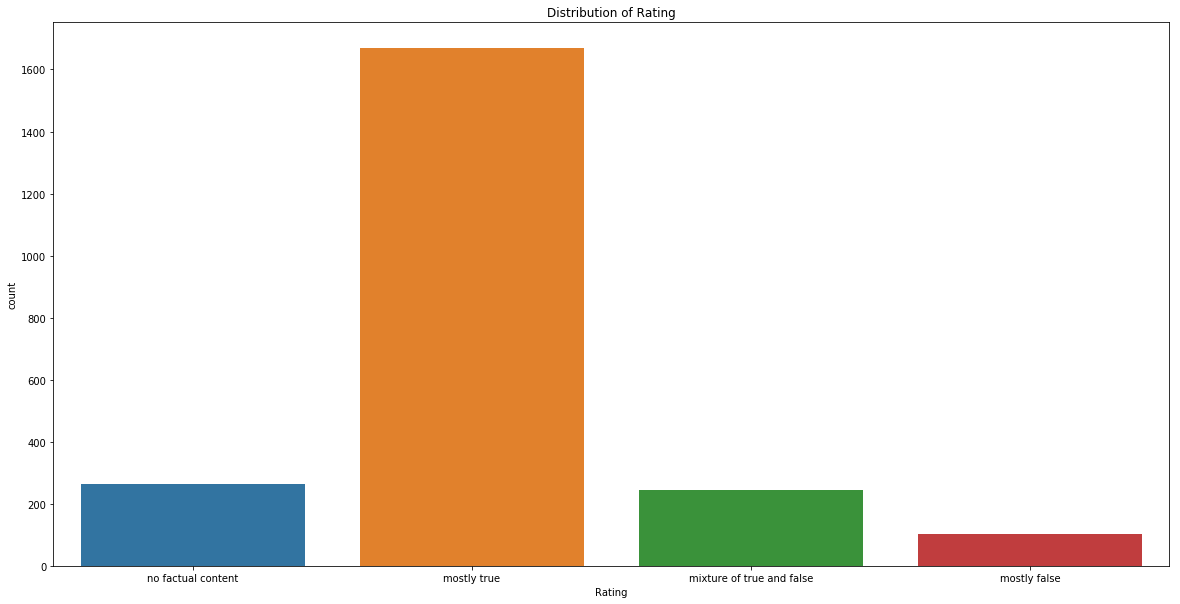

In [0]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(df['Rating'])
plt.title('Distribution of Rating')

In [0]:
df[Reaction_cols].isnull().sum()

share_count       70
reaction_count     2
comment_count      2
dtype: int64

In [0]:
page_grp[Reaction_cols].median().round()

share_count  reaction_count  comment_count
Category   Page                                                         
left       Addicting Info           563.0          2230.0          271.0
           Occupy Democrats       10931.0         22360.0         1205.0
           The Other 98%           3942.0         12083.0          521.0
mainstream ABC News Politics         13.0            80.0           28.0
           CNN Politics              50.0           340.0          194.0
           Politico                  33.0           314.0           95.0
right      Eagle Rising              92.0           186.0           22.0
           Freedom Daily            947.0          2245.0          214.0
           Right Wing News          266.0           913.0           91.0

In [0]:
page_grp[Reaction_cols].mean().round()

share_count  reaction_count  comment_count
Category   Page                                                         
left       Addicting Info          1270.0          3120.0          392.0
           Occupy Democrats       29205.0         34669.0         2858.0
           The Other 98%          18007.0         20971.0          915.0
mainstream ABC News Politics         44.0           177.0           71.0
           CNN Politics             183.0           678.0          322.0
           Politico                 182.0           900.0          170.0
right      Eagle Rising             616.0           520.0           79.0
           Freedom Daily           2474.0          3685.0          516.0
           Right Wing News         1398.0          2454.0          360.0

#Reaction by truthfulness

In [0]:
grp = df.groupby([ "Category", "Page", "Rating" ])

In [0]:
grp[Reaction_cols].size().unstack().fillna(0)

Rating                        mixture of true and false  mostly false  \
Category   Page                                                         
left       Addicting Info                          25.0           8.0   
           Occupy Democrats                        33.0           9.0   
           The Other 98%                           10.0           5.0   
mainstream ABC News Politics                        2.0           0.0   
           CNN Politics                             4.0           0.0   
           Politico                                 2.0           0.0   
right      Eagle Rising                            54.0          30.0   
           Freedom Daily                           26.0          26.0   
           Right Wing News                         89.0          26.0   

Rating                        mostly true  no factual content  
Category   Page                                                
left       Addicting Info            96.0                11.0  
           Occupy Democrats         102.0                65.0  
           The Other 98%             67.0                40.0  
mainstream ABC News Politics        172.0                26.0  
           CNN Politics             385.0                20.0  
           Politico                 528.0                 6.0  
right      Eagle Rising             121.0                81.0  
           Freedom Daily             56.0                 4.0  
           Right Wing News          142.0                11.0

In [0]:
grp[Reaction_cols].median().round()

share_count  \
Category   Page              Rating                                   
left       Addicting Info    mixture of true and false       1132.0   
                             mostly false                     285.0   
                             mostly true                      523.0   
                             no factual content               399.0   
           Occupy Democrats  mixture of true and false      10654.0   
                             mostly false                    5541.0   
                             mostly true                     7755.0   
                             no factual content             18345.0   
           The Other 98%     mixture of true and false       4749.0   
                             mostly false                   11571.0   
                             mostly true                     2896.0   
                             no factual content             10337.0   
mainstream ABC News Politics mixture of true and false         76.0   
                             mostly true                       12.0   
                             no factual content                38.0   
           CNN Politics      mixture of true and false        270.0   
                             mostly true                       48.0   
                             no factual content                64.0   
           Politico          mixture of true and false       7325.0   
                             mostly true                       33.0   
                             no factual content                48.0   
right      Eagle Rising      mixture of true and false        110.0   
                             mostly false                     534.0   
                             mostly true                       46.0   
                             no factual content               250.0   
           Freedom Daily     mixture of true and false        342.0   
                             mostly false                    1623.0   
                             mostly true                      908.0   
                             no factual content              2025.0   
           Right Wing News   mixture of true and false        457.0   
                             mostly false                     790.0   
                             mostly true                       91.0   
                             no factual content              4933.0   

                                                        reaction_count  \
Category   Page              Rating                                      
left       Addicting Info    mixture of true and false          3087.0   
                             mostly false                       1910.0   
                             mostly true                        1966.0   
                             no factual content                 2351.0   
           Occupy Democrats  mixture of true and false         17085.0   
                             mostly false                      17525.0   
                             mostly true                       15951.0   
                             no factual content                37326.0   
           The Other 98%     mixture of true and false          9040.0   
                             mostly false                      19682.0   
                             mostly true                        7082.0   
                             no factual content                25951.0   
mainstream ABC News Politics mixture of true and false           479.0   
                             mostly true                          78.0   
                             no factual content                   78.0   
           CNN Politics      mixture of true and false          1374.0   
                             mostly true                         343.0   
                             no factual content                  245.0   
           Politico          mixture of true and false         20344.0   
                

# Reaction by post type

In [0]:
type_grp[Reaction_cols].median().round()

share_count  reaction_count  \
Category   Page              Post Type                                
left       Addicting Info    link             563.0          2195.0   
                             photo           3532.0          5814.0   
                             video            275.0          1302.0   
           Occupy Democrats  link            5130.0         10862.0   
                             photo          18294.0         34730.0   
                             video          26648.0         30011.0   
           The Other 98%     link            3391.0          8836.0   
                             photo          12441.0         26990.0   
                             video           1598.0          4751.0   
mainstream ABC News Politics link               9.0            68.0   
                             photo              6.0            30.0   
                             text               2.0             5.0   
                             video             37.0           138.0   
           CNN Politics      link              36.0           284.0   
                             photo             51.0           118.0   
                             text               4.0            95.0   
                             video            125.0           691.0   
           Politico          link              32.0           290.0   
                             photo              8.0            62.0   
                             text               2.0            58.0   
                             video             48.0           428.0   
right      Eagle Rising      link              70.0           154.0   
                             photo            569.0           750.0   
                             video             38.0            73.0   
           Freedom Daily     link             964.0          2263.0   
                             text               3.0            47.0   
           Right Wing News   link             246.0           824.0   
                             photo           8474.0         12115.0   

                                        comment_count  
Category   Page              Post Type                 
left       Addicting Info    link               262.0  
                             photo              534.0  
                             video              117.0  
           Occupy Democrats  link              1020.0  
                             photo             1290.0  
                             video             2287.0  
           The Other 98%     link               529.0  
                             photo              604.0  
                             video              364.0  
mainstream ABC News Politics link                27.0  
                             photo               14.0  
                             text                 2.0  
                             video               32.0  
           CNN Politics      link               177.0  
                             photo               88.0  
                             text               103.0  
                             video              456.0  
           Politico          link                92.0  
                             photo               27.0  
                             text                26.0  
                             video              132.0  
right      Eagle Rising      link                20.0  
                             photo               24.0  
                             video               14.0  
           Freedom Daily     link               224.0  
                             text                 7.0  
           Right Wing News   link                87.0  
                             photo              180.0

# Shares by factual vs. no factual content

In [0]:
grp = df.groupby([ "Category", "Page", df["Rating"] == "no factual content" ])
pd.DataFrame({
    "median": grp["share_count"].median(),
    "average": grp["share_count"].mean()
}).round().unstack().stack(level=0).rename(columns={True: "no factual content", False: "factual content"})



Rating                                factual content  no factual content
Category   Page                                                          
left       Addicting Info    average           1150.0              2766.0
                             median             578.0               399.0
           Occupy Democrats  average          18155.0             55171.0
                             median            7997.0             18345.0
           The Other 98%     average          10820.0             32588.0
                             median            3484.0             10337.0
mainstream ABC News Politics average             43.0                63.0
                             median              13.0                38.0
           CNN Politics      average            182.0               215.0
                             median              48.0                64.0
           Politico          average            183.0                83.0
                             median              33.0                48.0
right      Eagle Rising      average            656.0               506.0
                             median              75.0               250.0
           Freedom Daily     average           2466.0              2712.0
                             median             947.0              2025.0
           Right Wing News   average           1127.0              7713.0
                             median             246.0              4933.0

# 4. Who is the author of the majority of the fake news?

In [0]:
fakeDf = df.loc[df['Rating'] == 'mostly false']

Text(0.5, 1.0, 'Fake news authors')

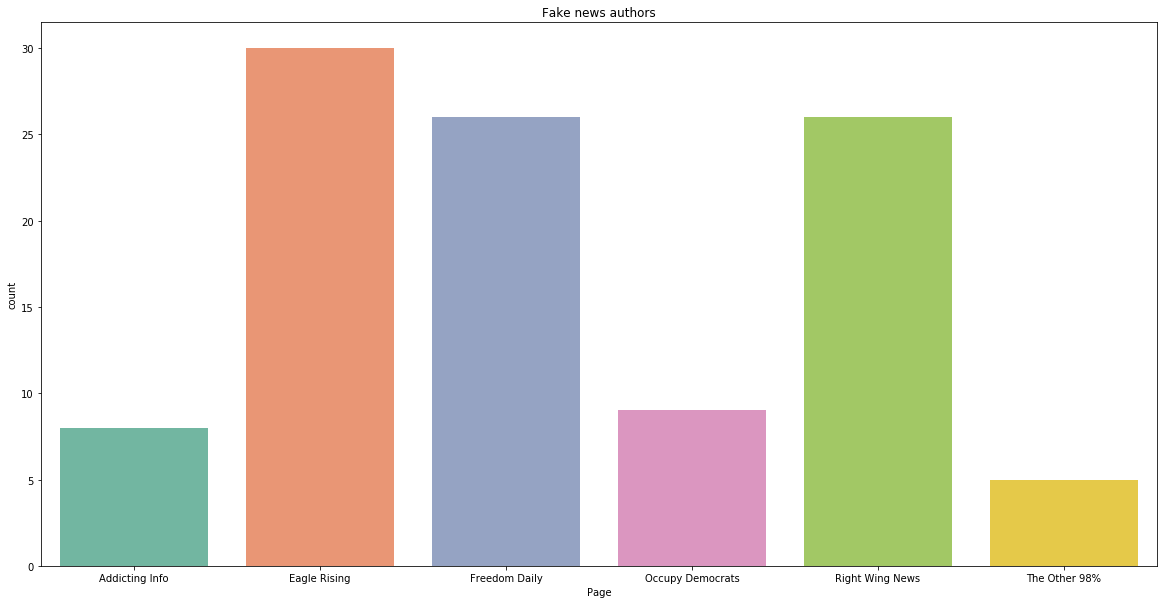

In [0]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(fakeDf['Page'], palette = 'Set2')
plt.title('Fake news authors')

Let's plot the share, reaction and comment to have a visualization of the engagement:

Text(0.5, 1.0, 'Shares on mostly false news')

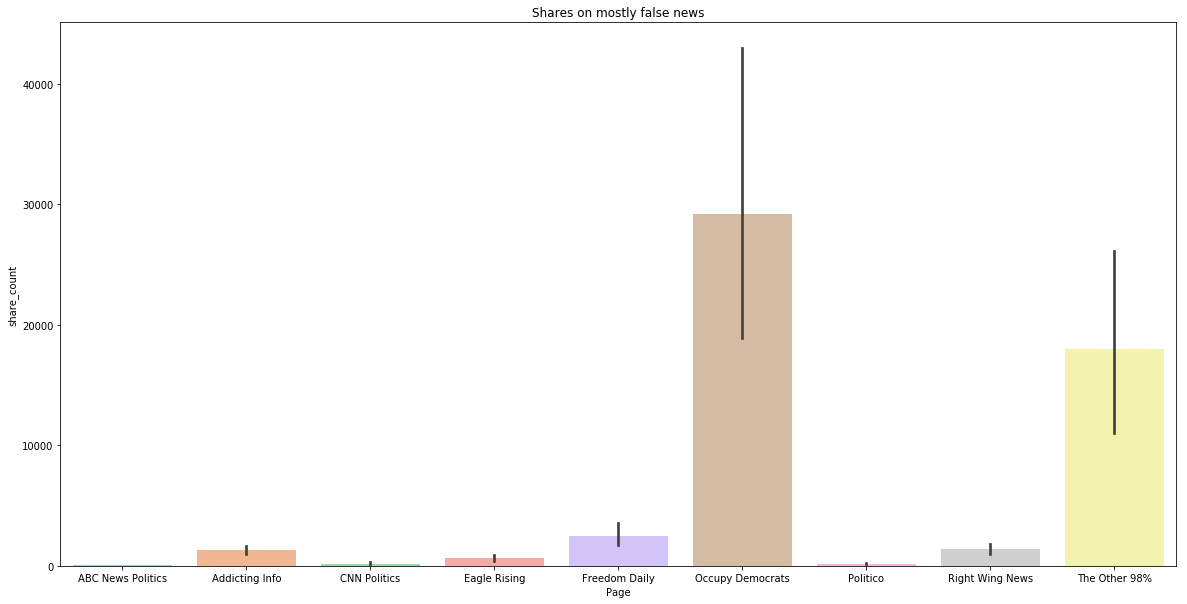

In [0]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.barplot(df['Page'], df['share_count'], palette='pastel')
plt.title('Shares on mostly false news')

Text(0.5, 1.0, 'Reactions on mostly false news')

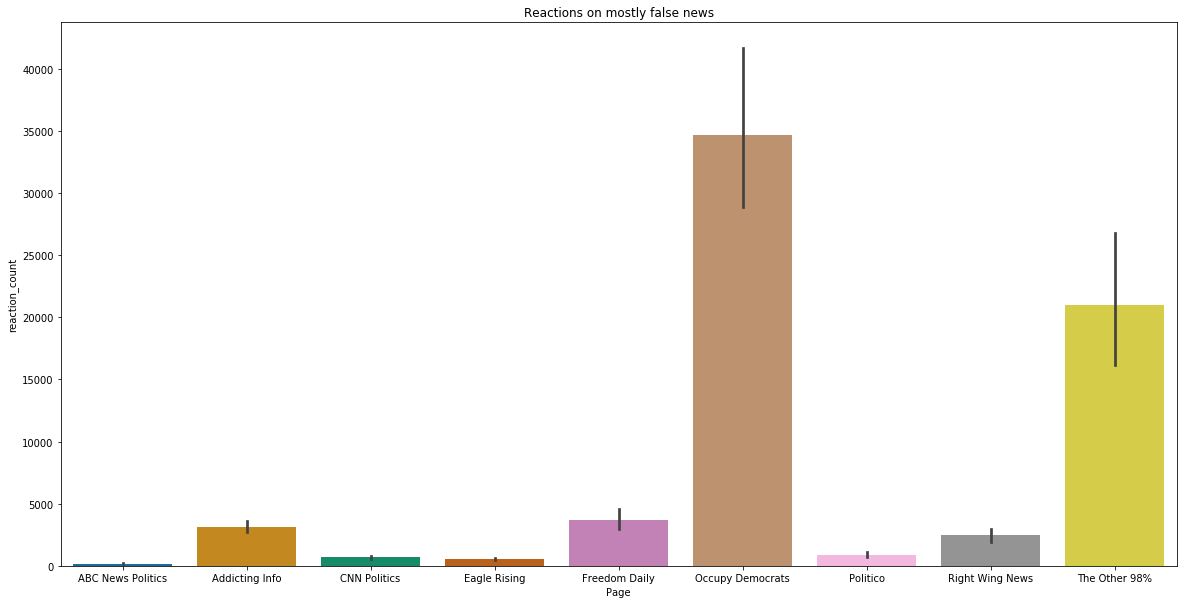

In [0]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.barplot(df['Page'], df['reaction_count'], palette='colorblind')
plt.title('Reactions on mostly false news')

Text(0.5, 1.0, 'Comments on mostly false news')

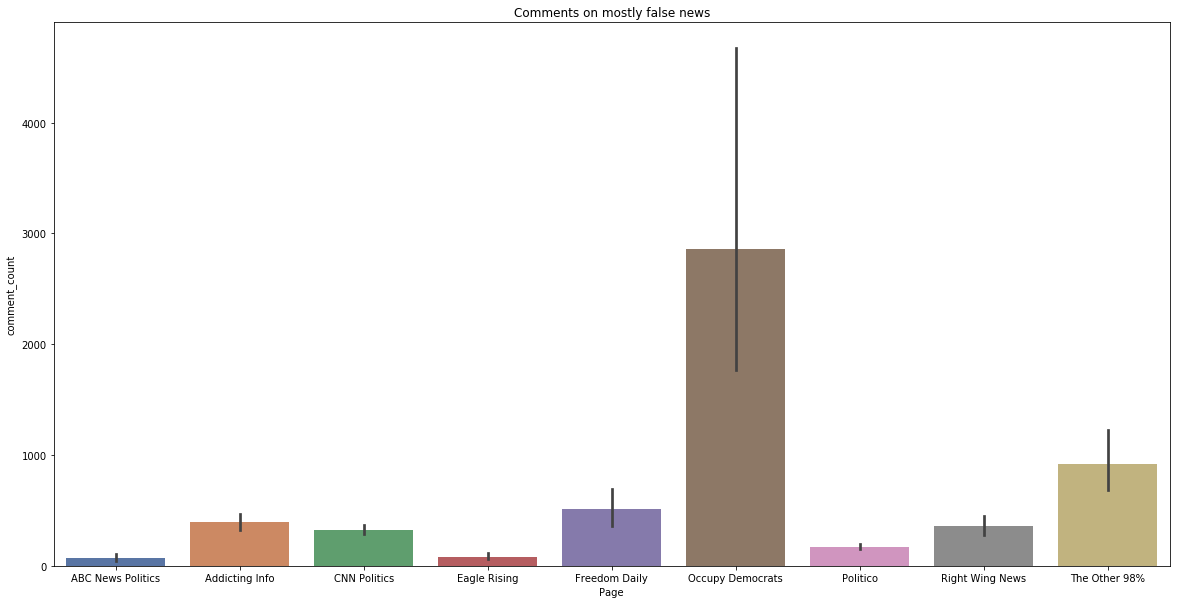

In [0]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.barplot(df['Page'], df['comment_count'], palette='deep')
plt.title('Comments on mostly false news')

#  “the least accurate pages generated some of the highest numbers of shares, reactions, and comments on Facebook”

In [0]:

df['TotalEngagement'] = df[['share_count', 'reaction_count', 'comment_count']].sum(1)

In [0]:
notPositiveDf = df.loc[(df['Rating'] == 'mixture of true and false') | (df['Rating'] == 'mostly false')]

In [0]:
notPositiveDf.head()

,account_id,post_id,Category,Page,Post URL,Date Published,Post Type,Rating,Debate,share_count,reaction_count,comment_count,TotalEngagement
37,184096565021911,1036151719816387,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-20,link,mixture of true and false,NaN,117.0,614.0,70.0,801.0
68,184096565021911,1037217126376513,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-21,link,mixture of true and false,NaN,35.0,344.0,48.0,427.0
201,146422995398181,1446620375378430,left,Addicting Info,https://www.facebook.com/AddictingInfoOrg/post...,2016-09-19,link,mixture of true and false,NaN,241.0,2027.0,226.0,2494.0
202,146422995398181,1446625628711238,left,Addicting Info,https://www.facebook.com/AddictingInfoOrg/post...,2016-09-19,link,mixture of true and false,NaN,991.0,3087.0,313.0,4391.0
210,146422995398181,1447249158648885,left,Addicting Info,https://www.facebook.com/AddictingInfoOrg/post...,2016-09-19,link,mixture of true and false,NaN,1145.0,6552.0,562.0,8259.0


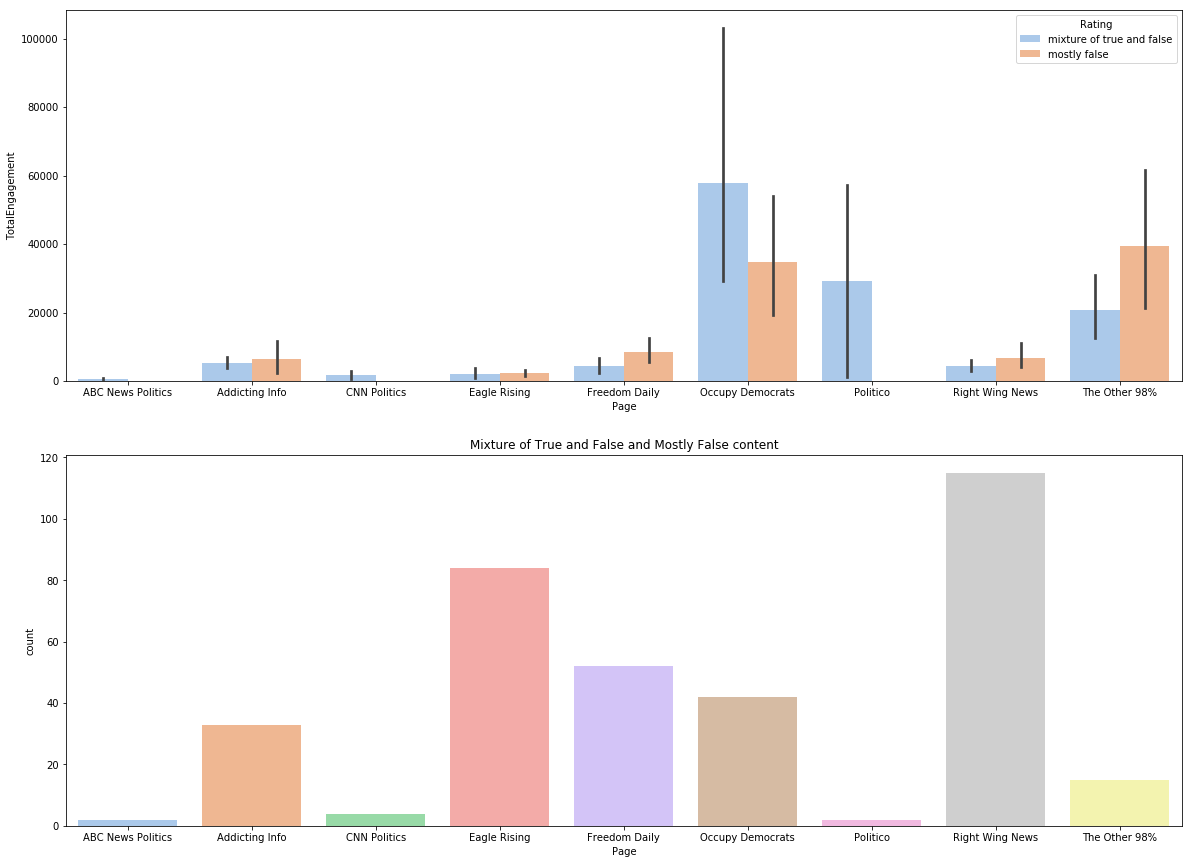

In [0]:
fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

sns.barplot(x="Page", y="TotalEngagement",hue="Rating", data=notPositiveDf, ax=ax1, palette = 'pastel')
plt.title('Mixture of True and False and Mostly False content')
sns.countplot(x="Page", data=notPositiveDf, ax=ax2, palette = 'pastel')

In [0]:
df1 = df


In [0]:
df1['Rating'].unique()

array(['no factual content', 'mostly true', 'mixture of true and false',
       'mostly false'], dtype=object)

In [0]:
facts = ['mostly true','mixture of true and false']
fake = ['no factual content','mostly false']

In [0]:
import numpy as np
conditions = [
    ((df1['Rating'] == 'mostly true') | (df1['Rating'] == 'mixture of true and false' )),
    ((df1['Rating'] == 'no factual content') | (df1['Rating'] == 'mostly false' ))]
   
choices = ['1', '0']
df1['label'] = np.select(conditions, choices, default='2')

In [0]:
df1.head(12)

,account_id,post_id,Category,Page,Post URL,Date Published,Post Type,Rating,Debate,share_count,reaction_count,comment_count,TotalEngagement,label
0,184096565021911,1035057923259100,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,no factual content,NaN,NaN,146.0,15.0,161.0,0
1,184096565021911,1035269309904628,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,1.0,33.0,34.0,68.0,1
2,184096565021911,1035305953234297,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,34.0,63.0,27.0,124.0,1
3,184096565021911,1035322636565962,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,35.0,170.0,86.0,291.0,1
4,184096565021911,1035352946562931,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,mostly true,NaN,568.0,3188.0,2815.0,6571.0,1
5,184096565021911,1035366579894901,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,23.0,28.0,21.0,72.0,1
6,184096565021911,1035411183223774,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,mostly true,NaN,46.0,409.0,105.0,560.0,1
7,184096565021911,1035430716555154,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,7.0,62.0,64.0,133.0,1
8,184096565021911,1035451683219724,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,7.0,39.0,6.0,52.0,1
9,184096565021911,1035453279886231,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,mostly true,NaN,152.0,278.0,59.0,489.0,1


# Decision tree

In [0]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier





encoded_data = pd.DataFrame({}) 
abridge_columns = df[["Category","Page", "Post Type","TotalEngagement"]]
# Iterating over all columns
for column in abridge_columns.columns:
    # Checking if column has type 'object'
    if abridge_columns[column].dtype == np.dtype('object'):
        # using one-hot encoding for this column
        encoding = pd.get_dummies(abridge_columns[column])
        # append expanded attribute to data frame
        encoded_data = pd.concat([encoded_data, encoding], axis=1)
    else:
        encoded_data = pd.concat([encoded_data, abridge_columns[[column]]], axis=1)


y = df["label"]

X_traine, X_teste, y_traine, y_teste = train_test_split(encoded_data, y, test_size = 0.25, random_state=1)

tree = tree.DecisionTreeClassifier()
tree.fit(X_traine,y_traine)
y_pred = tree.predict(X_teste)

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

           0       0.42      0.48      0.45        87
           1       0.90      0.88      0.89       484

   micro avg       0.82      0.82      0.82       571
   macro avg       0.66      0.68      0.67       571
weighted avg       0.83      0.82      0.82       571



In [0]:
print('Score:', tree.score(X_teste, y_teste))

Score: 0.819614711033275


# Random Forest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier()
random.fit(X_traine, y_traine)

predictions_restaurant_random = random.predict(X_teste) 
print('Score:', random.score(X_teste, y_teste))


Score: 0.8248686514886164


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# XGBoost Classifier

In [0]:
import xgboost as xgb
from xgboost import XGBClassifier

In [0]:
xgb = XGBClassifier(n_estimators= 100, max_depth=20, min_samples_split=2,
          learning_rate= 0.5)


xgb.fit(X_traine, y_traine)
xgb_pred = xgb.predict(X_teste) 
xgb_pred

array(['1', '0', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1',
       '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '0', '1',
       '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1',
       '0', '1', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '0',
       '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '0', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1',
       '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1',
       '1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '0', '1', '0', '1', '1

In [0]:
print('Score:', xgb.score(X_teste, y_teste))



Score: 0.8353765323992994


# Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
logreg = LogisticRegression()


In [0]:
logreg.fit(X_traine, y_traine)
xgb_pred = logreg.predict(X_teste) 
logreg

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
print('Score:', xgb.score(X_teste, y_teste))



Score: 0.8353765323992994
